<a href="https://colab.research.google.com/github/Shrason/Projects/blob/main/Fitbit_Daily_Activity_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fitbit Consumer Behavior Analysis

**Importing Libraries**

---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

**Loading data**

---



In [2]:
data = pd.read_csv('/content/dailyActivity_merged.csv')

In [3]:
data.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

**Data Cleaning**

---



In [5]:
data['ActivityDate'] = pd.to_datetime(data['ActivityDate'])

In [6]:
data['ActivityDate'].dtype

dtype('<M8[ns]')

In [7]:
data.columns = data.columns.str.lower()

In [8]:
data.columns

Index(['id', 'activitydate', 'totalsteps', 'totaldistance', 'trackerdistance',
       'loggedactivitiesdistance', 'veryactivedistance',
       'moderatelyactivedistance', 'lightactivedistance',
       'sedentaryactivedistance', 'veryactiveminutes', 'fairlyactiveminutes',
       'lightlyactiveminutes', 'sedentaryminutes', 'calories'],
      dtype='object')

In [9]:
data.rename(columns={'activitydate':'activity_date', 'totalsteps':'total_steps','totaldistance':'total_distance', 'trackerdistance':'tracker_distance',
       'loggedactivitiesdistance':'logged_activities_distance', 'veryactivedistance':'very_active_distance',
       'moderatelyactivedistance':'moderately_active_distance', 'lightactivedistance':'light_active_distance',
       'sedentaryactivedistance':'sedentary_active_distance', 'veryactiveminutes':'very_active_minutes', 'fairlyactiveminutes':'fairly_active_minutes',
       'lightlyactiveminutes':'lightly_active_minutes', 'sedentaryminutes':'sedentary_minutes'},inplace=True)

In [10]:
data.columns

Index(['id', 'activity_date', 'total_steps', 'total_distance',
       'tracker_distance', 'logged_activities_distance',
       'very_active_distance', 'moderately_active_distance',
       'light_active_distance', 'sedentary_active_distance',
       'very_active_minutes', 'fairly_active_minutes',
       'lightly_active_minutes', 'sedentary_minutes', 'calories'],
      dtype='object')

**Univariate Analysis**

---



**_Non-Visual Analysis**

In [11]:
def numerical_data(numerical_feature):
  for col in numerical_feature:
    print('*'*5, col, '*'*5)
    print(numerical_feature[col].agg(['count', 'nunique', 'mean','max','min','std','skew','kurtosis']))
    print()


In [12]:
df = data[['total_steps', 'total_distance',
       'tracker_distance', 'logged_activities_distance',
       'very_active_distance', 'moderately_active_distance',
       'light_active_distance', 'sedentary_active_distance',
       'very_active_minutes', 'fairly_active_minutes',
       'lightly_active_minutes', 'sedentary_minutes', 'calories']]

In [13]:
numerical_data(df)

***** total_steps *****
count         940.000000
nunique       842.000000
mean         7637.910638
max         36019.000000
min             0.000000
std          5087.150742
skew            0.652895
kurtosis        1.169111
Name: total_steps, dtype: float64

***** total_distance *****
count       940.000000
nunique     615.000000
mean          5.489702
max          28.030001
min           0.000000
std           3.924606
skew          1.126274
kurtosis      3.113018
Name: total_distance, dtype: float64

***** tracker_distance *****
count       940.000000
nunique     613.000000
mean          5.475351
max          28.030001
min           0.000000
std           3.907276
skew          1.134550
kurtosis      3.203889
Name: tracker_distance, dtype: float64

***** logged_activities_distance *****
count       940.000000
nunique      19.000000
mean          0.108171
max           4.942142
min           0.000000
std           0.619897
skew          6.297440
kurtosis     41.295941
Name: logged_act

**_Visual Analysis**

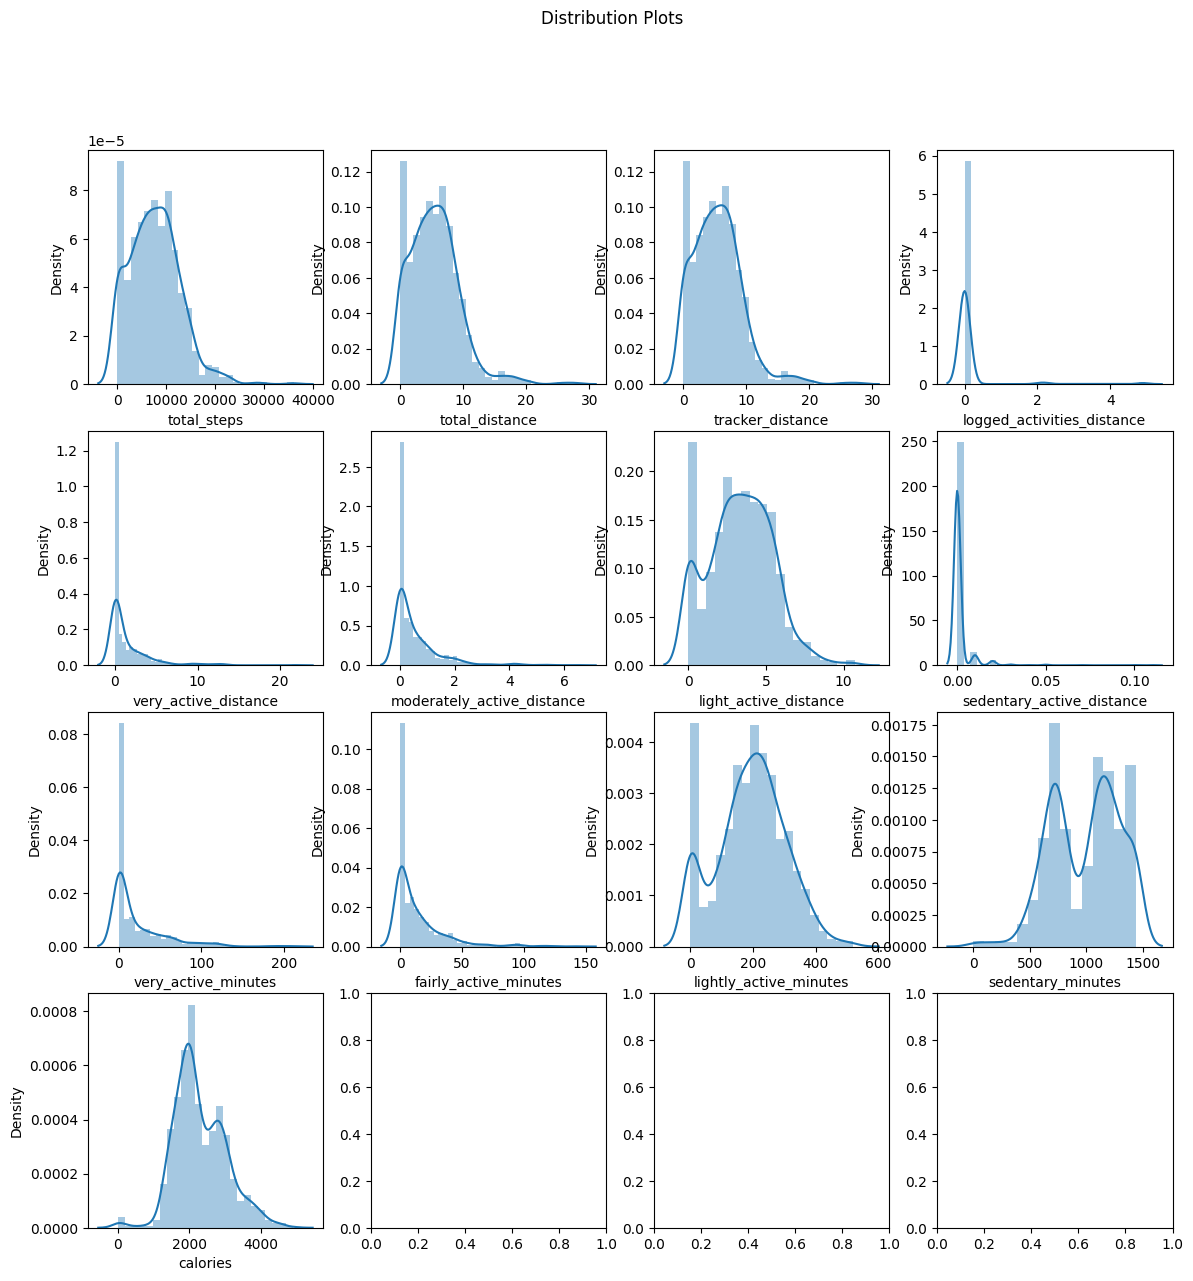

In [14]:
fig ,axes = plt.subplots(nrows=int(np.ceil(len(df.columns)/4)),
ncols=4,figsize=(14,14))
for i, column in enumerate(df.columns):
  row = int(i//4)
  col = i%4
  sns.distplot(df[column],ax=axes[row,col])
  fig.suptitle("Distribution Plots")

plt.show()


total_steps                      Axes(0.125,0.798085;0.227941x0.0819149)
total_distance                Axes(0.398529,0.798085;0.227941x0.0819149)
tracker_distance              Axes(0.672059,0.798085;0.227941x0.0819149)
logged_activities_distance       Axes(0.125,0.699787;0.227941x0.0819149)
very_active_distance          Axes(0.398529,0.699787;0.227941x0.0819149)
moderately_active_distance    Axes(0.672059,0.699787;0.227941x0.0819149)
light_active_distance            Axes(0.125,0.601489;0.227941x0.0819149)
sedentary_active_distance     Axes(0.398529,0.601489;0.227941x0.0819149)
very_active_minutes           Axes(0.672059,0.601489;0.227941x0.0819149)
fairly_active_minutes            Axes(0.125,0.503191;0.227941x0.0819149)
lightly_active_minutes        Axes(0.398529,0.503191;0.227941x0.0819149)
sedentary_minutes             Axes(0.672059,0.503191;0.227941x0.0819149)
calories                         Axes(0.125,0.404894;0.227941x0.0819149)
dtype: object

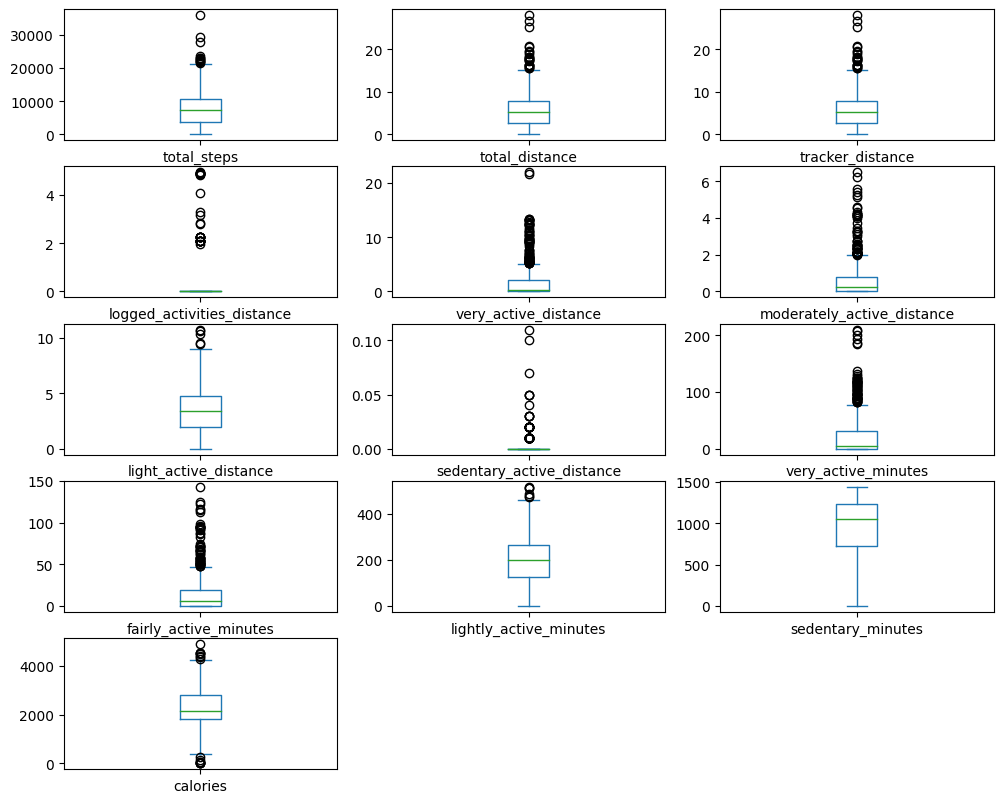

In [15]:
df.plot(kind='box',subplots=True,layout=(8,3),figsize=(12,16))

Univariate Analysis Observation:
- The datapoints of all features in the data are not uniformly distributed.
- Except sedentary minutes other features have outliers.

**Bivariate Analysis**

---



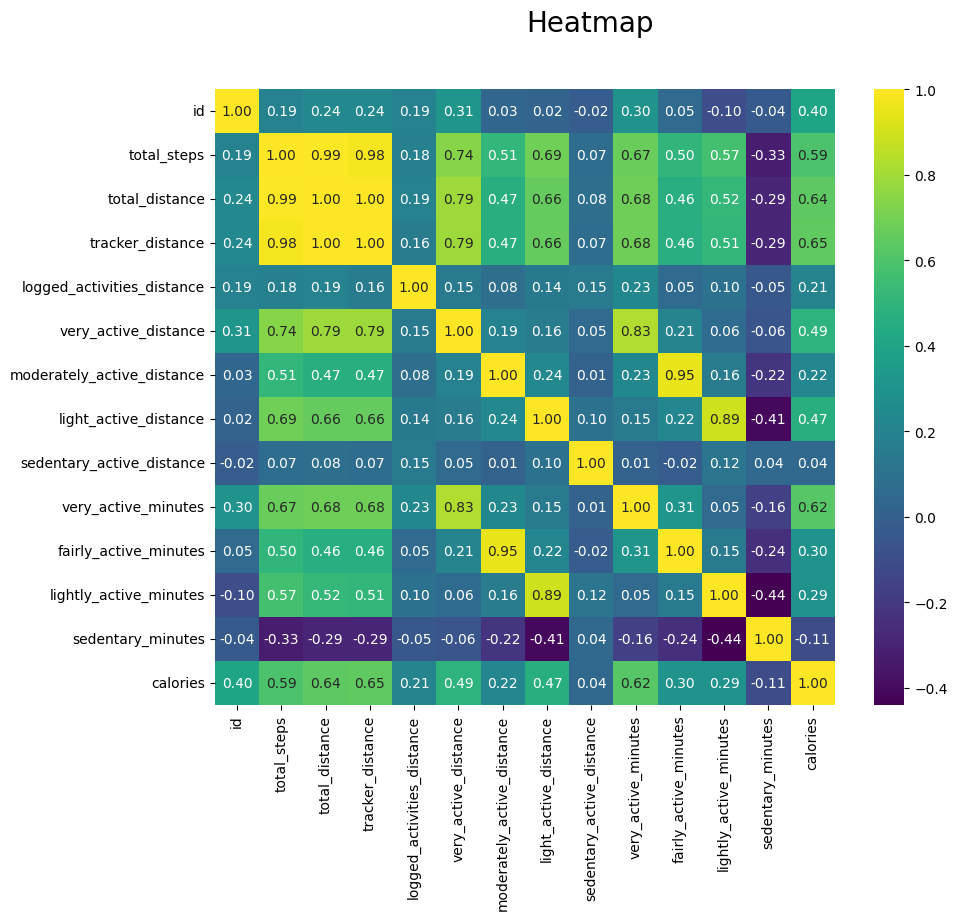

In [16]:
f,ax = plt.subplots(figsize=(10,8))
corr = data.corr()
hm = sns.heatmap(round(corr,2),annot=True, cmap='viridis',fmt='.2f')
t=f.suptitle('Heatmap',fontsize=20)


- Total steps, Total distance, Tracker distance shows correlation with very active, moderately/fairly active, light active diatance and minutes, and also with calories.

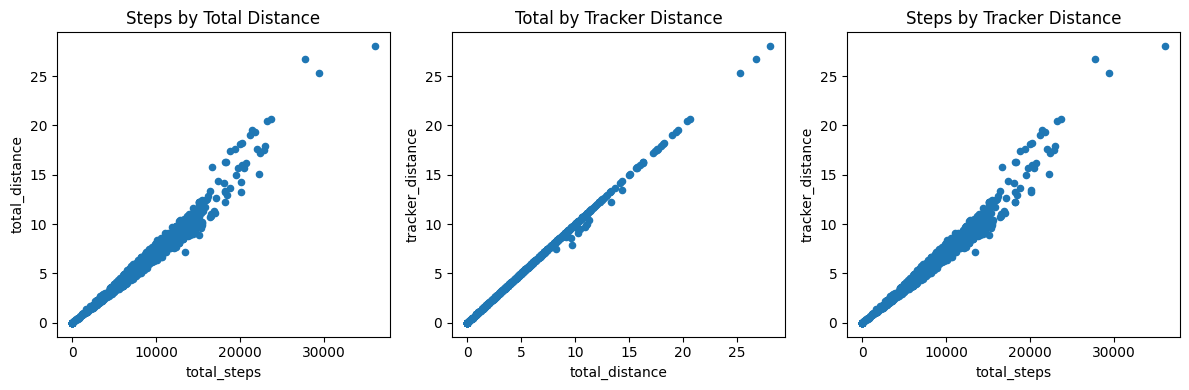

In [17]:
fig,axes = plt.subplots(1,3,figsize=(12,4))
data.plot(kind='scatter', x='total_steps', y='total_distance',ax=axes[0])
axes[0].set_title('Steps by Total Distance')

data.plot(kind='scatter', x='total_distance',y='tracker_distance', ax=axes[1])
axes[1].set_title('Total by Tracker Distance')

data.plot(kind='scatter', x='total_steps', y='tracker_distance',ax=axes[2])
axes[2].set_title('Steps by Tracker Distance')

plt.tight_layout()
plt.show()

- Total distance, total steps and tracker distance are linearly correlated.

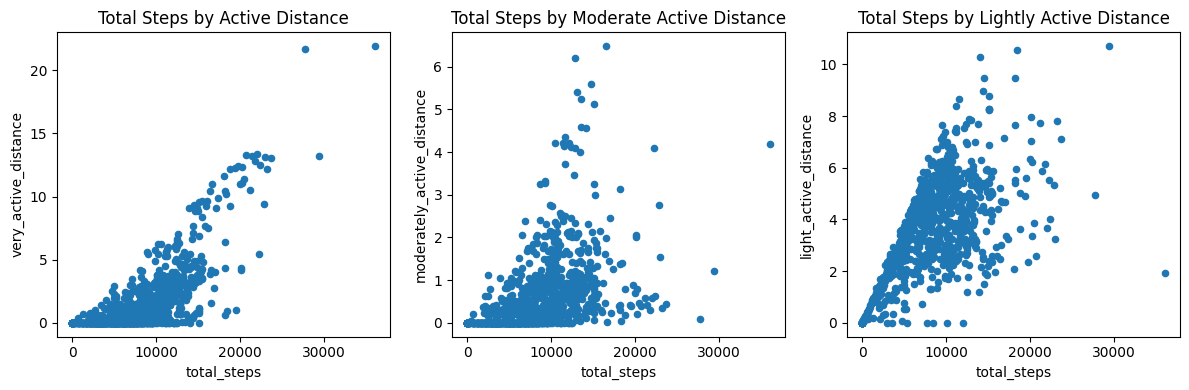

In [18]:
f,ax = plt.subplots(1,3, figsize=(12,4))
data.plot(kind='scatter', x='total_steps', y='very_active_distance',ax=ax[0])
ax[0].set_title('Total Steps by Active Distance')

data.plot(kind='scatter', x='total_steps', y='moderately_active_distance',ax=ax[1])
ax[1].set_title('Total Steps by Moderate Active Distance')

data.plot(kind='scatter', x='total_steps', y='light_active_distance',ax=ax[2])
ax[2].set_title('Total Steps by Lightly Active Distance')

plt.tight_layout()
plt.show()

- For total steps 10000-20000, the very active distance ranges near about from 0-15.
- For total steps 10000-20000, the moderately active distance ranges near about from 0-5.
- For total steps 10000-20000, the light active distance ranges near about from 2-8.

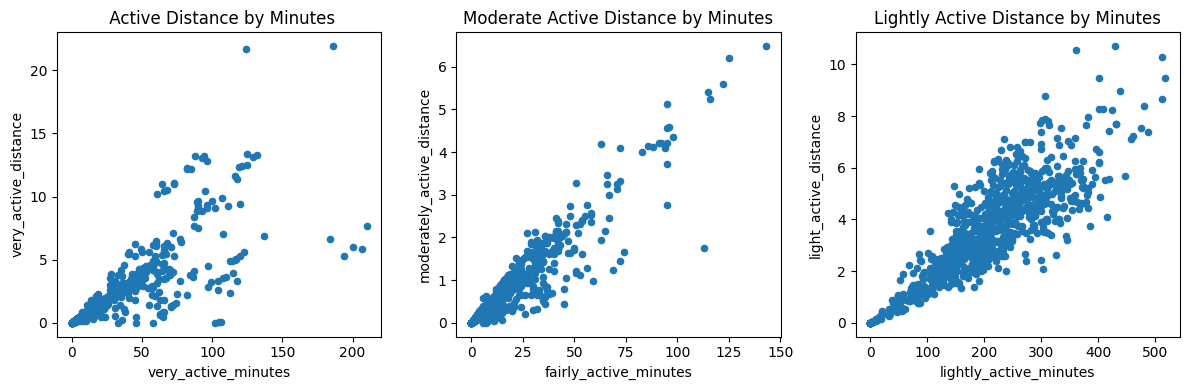

In [19]:
f,ax = plt.subplots(1,3, figsize=(12,4))
data.plot(kind='scatter', x='very_active_minutes', y='very_active_distance',ax=ax[0])
ax[0].set_title(' Active Distance by Minutes')

data.plot(kind='scatter', x='fairly_active_minutes', y='moderately_active_distance',ax=ax[1])
ax[1].set_title('Moderate Active Distance by Minutes')

data.plot(kind='scatter', x='lightly_active_minutes', y='light_active_distance',ax=ax[2])
ax[2].set_title('Lightly Active Distance by Minutes')

plt.tight_layout()
plt.show()

- Active minutes to active distances are some what linearly correlated.

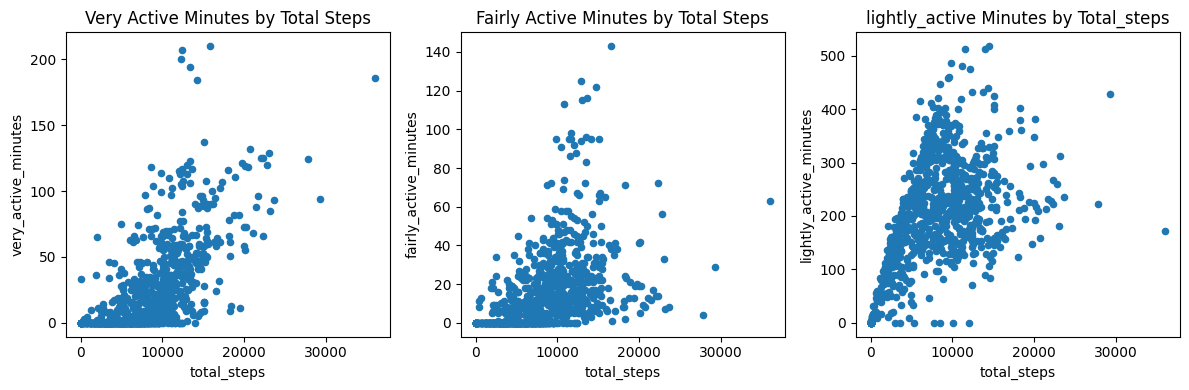

In [20]:
f,ax = plt.subplots(1,3,figsize=(12,4))
data.plot(kind='scatter', x='total_steps', y='very_active_minutes',ax=ax[0])
ax[0].set_title('Very Active Minutes by Total Steps')

data.plot(kind='scatter', x='total_steps', y='fairly_active_minutes', ax=ax[1])
ax[1].set_title('Fairly Active Minutes by Total Steps')

data.plot(kind='scatter', x='total_steps', y= 'lightly_active_minutes', ax=ax[2])
ax[2].set_title('lightly_active Minutes by Total_steps')

plt.tight_layout()
plt.show()


- For total steps 10000-20000, the very active minutes near about ranges from 0-140.
- For total steps 10000-20000, the fairly active minutes near about ranges from 0-120.
- For total steps 10000-20000, the light active minutes near about ranges from 100-400.

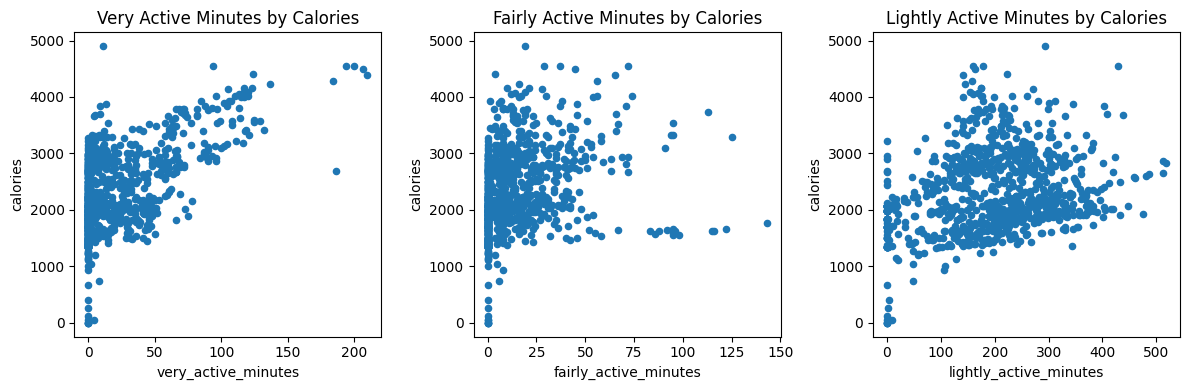

In [21]:
f,ax = plt.subplots(1,3,figsize=(12,4))
data.plot(kind='scatter', x='very_active_minutes', y='calories',ax=ax[0])
ax[0].set_title('Very Active Minutes by Calories')

data.plot(kind='scatter', x='fairly_active_minutes', y='calories', ax=ax[1])
ax[1].set_title('Fairly Active Minutes by Calories')

data.plot(kind='scatter', x='lightly_active_minutes', y= 'calories', ax=ax[2])
ax[2].set_title('Lightly Active Minutes by Calories')

plt.tight_layout()
plt.show()

- For burning 3000 calories, very active minutes ranges near about 0-50.
- For burning 3000 calories, fairly active minutes  ranges near about 0-50.
- For burning 3000 calories, lightly active minutes  ranges near about 50-400.

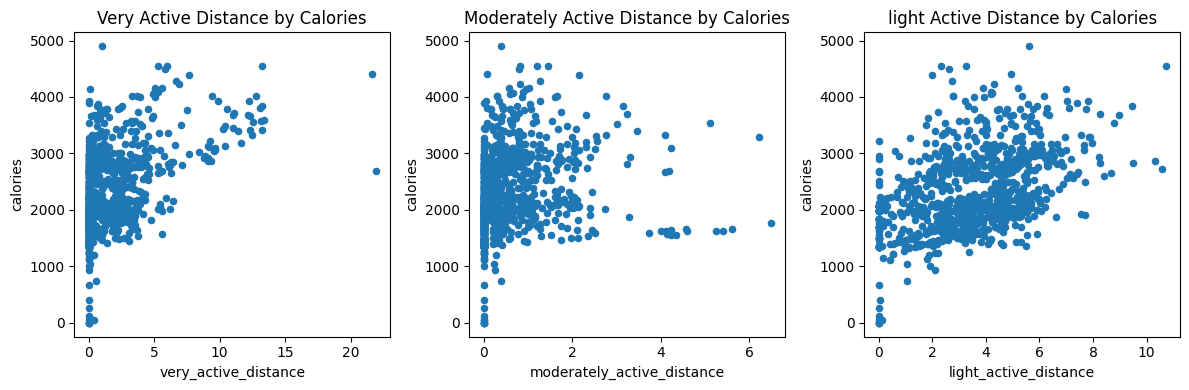

In [22]:
f,ax = plt.subplots(1,3,figsize=(12,4))
data.plot(kind='scatter', x='very_active_distance', y='calories',ax=ax[0])
ax[0].set_title('Very Active Distance by Calories')

data.plot(kind='scatter', x='moderately_active_distance', y='calories', ax=ax[1])
ax[1].set_title('Moderately Active Distance by Calories')

data.plot(kind='scatter', x='light_active_distance', y= 'calories', ax=ax[2])
ax[2].set_title('light Active Distance by Calories')

plt.tight_layout()
plt.show()

- For burning 3000 calories, very active distance  ranges near about 0-5.
- For burning 3000 calories, moderately active distance  ranges near about 0-2.
- For burning 3000 calories, light active distance  ranges near about 0-8.

In [23]:
data_steps_id = data.groupby(['id'])['total_steps'].mean()

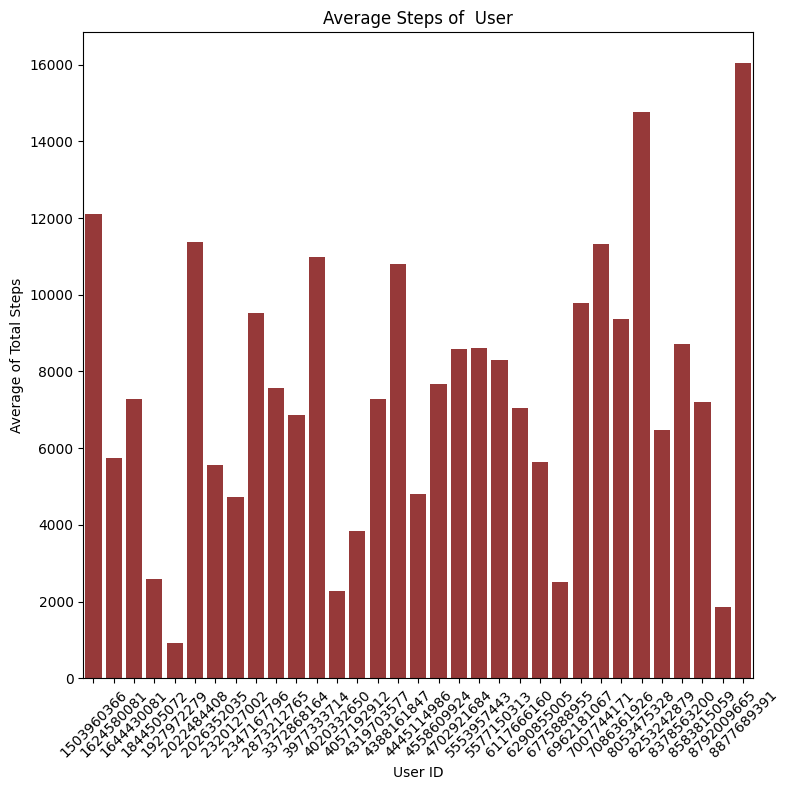

In [24]:
plt.figure(figsize=(8, 8))
sns.barplot(x=data_steps_id.index, y=data_steps_id.values,color='brown')
plt.xlabel('User ID')
plt.ylabel('Average of Total Steps')
plt.title('Average Steps of  User')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- On an average most users total steps are around 5000 and above.

In [25]:
data_distance_id = data.groupby(['id'])['total_distance'].mean()

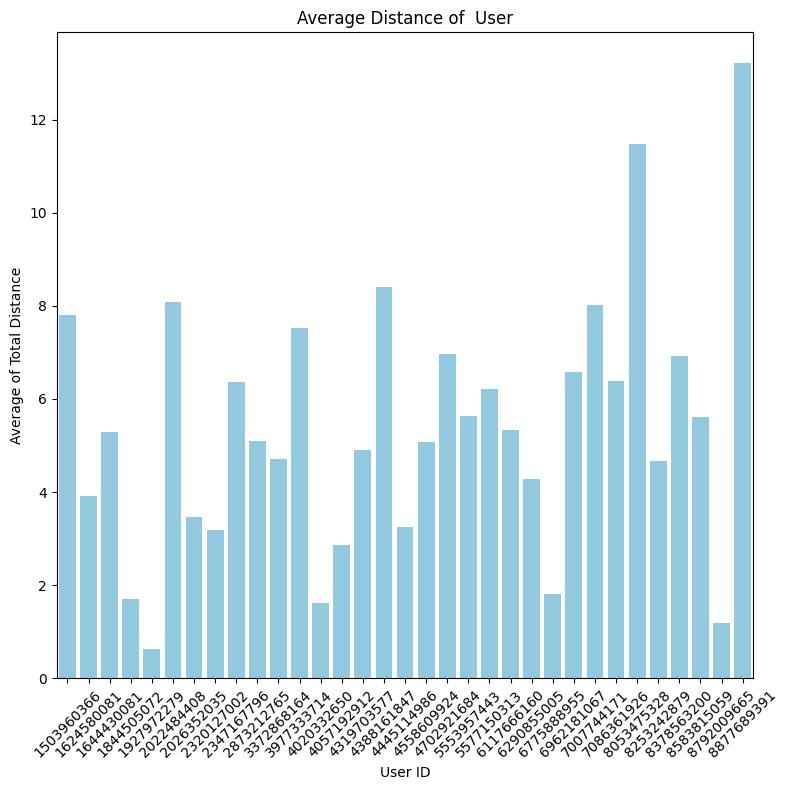

In [26]:
plt.figure(figsize=(8, 8))
sns.barplot(x=data_distance_id.index, y=data_distance_id.values,color='skyblue')
plt.xlabel('User ID')
plt.ylabel('Average of Total Distance')
plt.title('Average Distance of  User')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- On an average most users total distace covered is 3 and above.

In [27]:
data_calories_id = data.groupby(['id'])['calories'].mean()

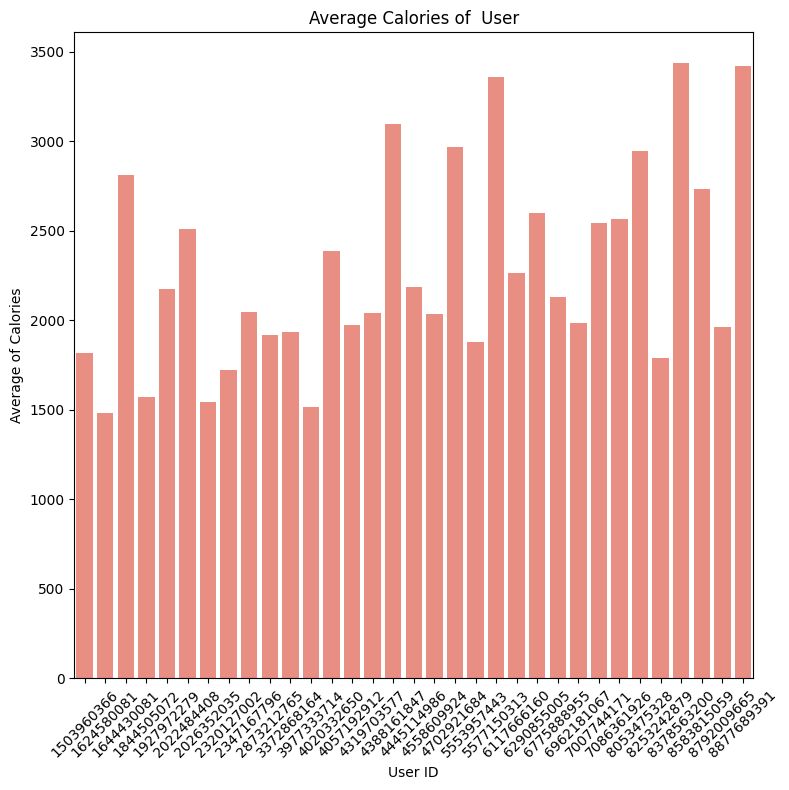

In [28]:
plt.figure(figsize=(8, 8))
sns.barplot(x=data_calories_id.index, y=data_calories_id.values,color='salmon')
plt.xlabel('User ID')
plt.ylabel('Average of Calories')
plt.title('Average Calories of  User')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- On an average mininum calories burn by the users is 1500.

Overall Observations:
- Total distance, total steps and tracker distance are linearly correlated.
- For total steps 10000-20000, the very active distance,moderately active distance and light active distance ranges near about from 0-15, 0-5 and 2-8 respectively.
- Active minutes to active distances are some what linearly correlated.
- For total steps 10000-20000, the very active minutes,fairly active minutes and light active minutes  ranges near about from 0-140, 0-120 and 100-400 respectively.
- For burning 3000 calories, very active minutes, fairly active minutes and  lightly active minutes ranges near about 0-50 (for very and fairly active) and 50-400.
- For burning 3000 calories, very active distance, moderately active distance and light active distance ranges near about 0-5, 0-2 and 0-8.
- On an average most users daily total steps are around 5000 and above.
- On an average most users daily total distance covered is 3 and above.
- On an average mininum daily calories burn by the users is 1500.